In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

# For the "Median value of owner-occupied homes" provide a boxplot

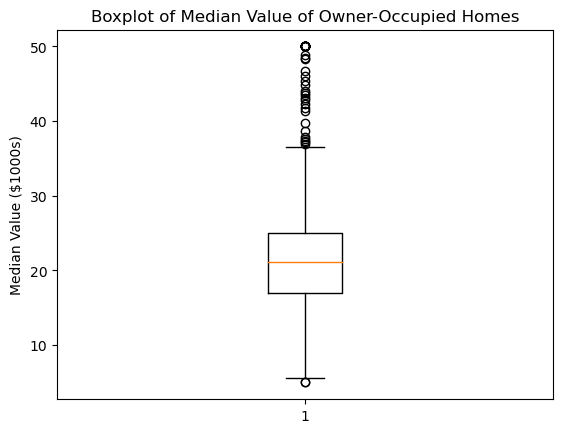

In [4]:
# Create a boxplot for the Median value of owner-occupied homes
plt.boxplot(boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.ylabel("Median Value ($1000s)")
plt.show()

We have alot of outliers

# Provide a  bar plot for the Charles river variable

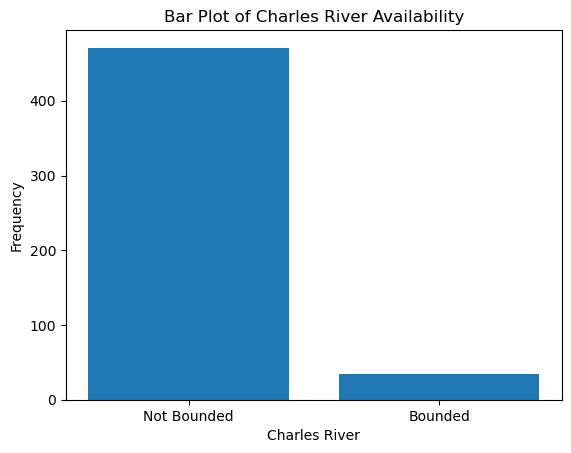

In [5]:
# Count the occurrences of each category in the 'CHAS' column
charles_river_counts = boston_df['CHAS'].value_counts()

# Create a bar plot
plt.bar(charles_river_counts.index, charles_river_counts.values)
plt.title("Bar Plot of Charles River Availability")
plt.xlabel("Charles River")
plt.ylabel("Frequency")
plt.xticks(charles_river_counts.index, ['Not Bounded', 'Bounded'])
plt.show()

# Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


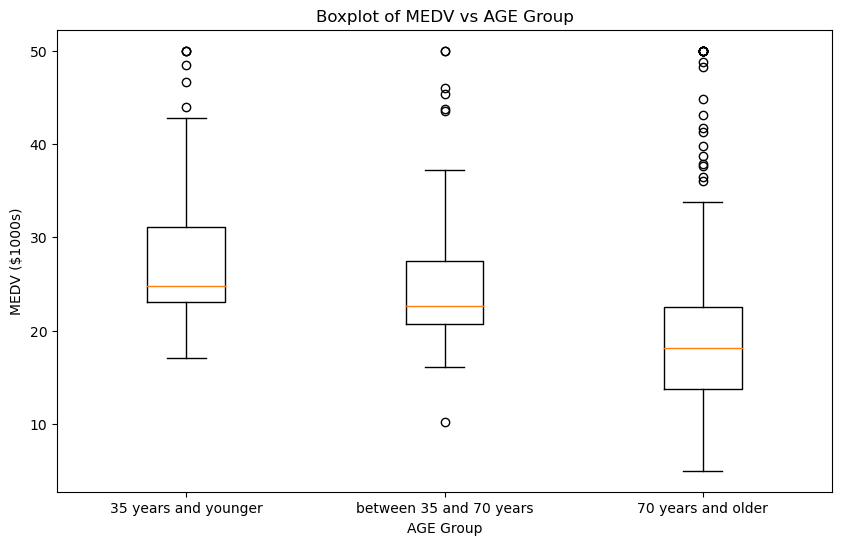

In [8]:
# Discretize the AGE variable
def AGE_discretizer(AGE):
    if AGE <= 35:
        return "35 years and younger"
    elif 35 < AGE <= 70:
        return "between 35 and 70 years"
    else:
        return "70 years and older"

boston_df['AGE_group'] = boston_df['AGE'].apply(AGE_discretizer)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot([boston_df[boston_df['AGE_group'] == '35 years and younger']['MEDV'],
             boston_df[boston_df['AGE_group'] == 'between 35 and 70 years']['MEDV'],
             boston_df[boston_df['AGE_group'] == '70 years and older']['MEDV']],
            labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])
plt.title("Boxplot of MEDV vs AGE Group")
plt.xlabel("AGE Group")
plt.ylabel("MEDV ($1000s)")
plt.show()

# Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

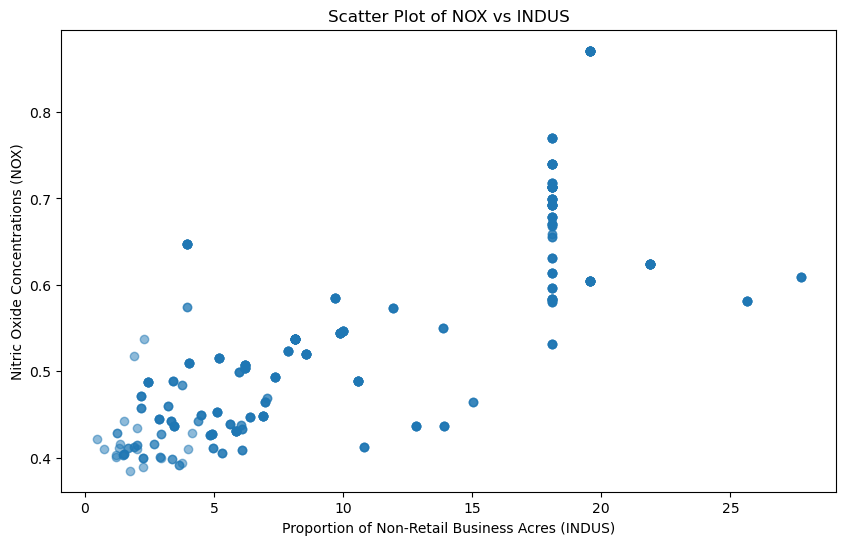

In [9]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(boston_df['INDUS'], boston_df['NOX'], alpha=0.5)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxide Concentrations (NOX)")
plt.show()

1) Trend: As the proportion of non-retail business acres ("INDUS") increases, there seems to be a general trend of higher nitric oxide concentrations ("NOX").

2) Spread: While the trend is apparent, there is also some variability in nitric oxide concentrations for a given value of non-retail business acreage. This indicates that other factors might also influence nitric oxide concentrations.

3) Correlation: The scatter plot suggests a positive correlation between "NOX" and "INDUS," meaning that as the proportion of non-retail business acres increases, the nitric oxide concentrations tend to increase as well.

4) Outliers: There appear to be a few outliers where the nitric oxide concentrations are relatively high for lower values of non-retail business acreage.

# Create a histogram for the pupil to teacher ratio variable

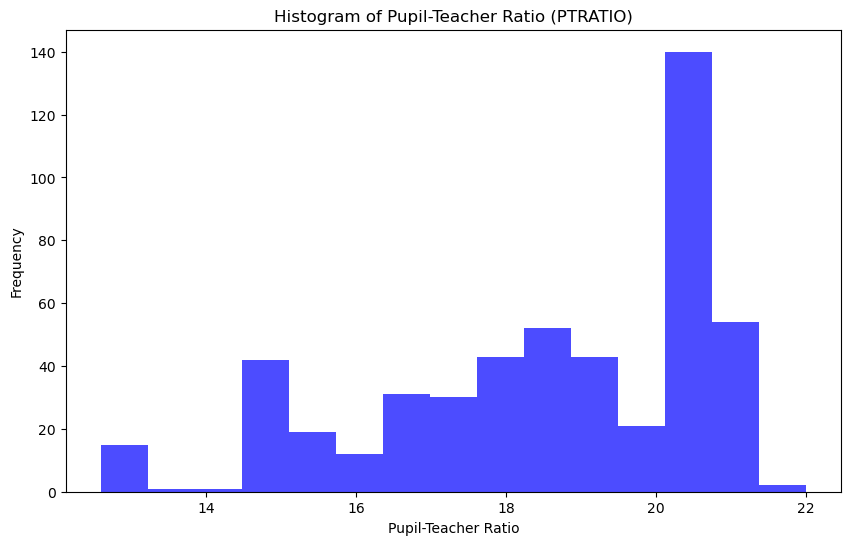

In [10]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='blue', alpha=0.7)
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Hypotheses:

-Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles River.

-Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles River.

-Significance Level: α = 0.05

In [11]:
import scipy.stats as stats

# Extract median values of houses bounded and not bounded by Charles River
median_bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
median_not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(median_bounded, median_not_bounded)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference."
    
print(conclusion)


T-Statistic: 3.996437466090509
P-Value: 7.390623170519905e-05
Reject the null hypothesis. There is a significant difference.


# Conclusion:

Based on the results of the t-test, the p-value is less than 0.05, We can reject the null hypothesis and conclude that there is a significant difference in the median value of houses bounded by the Charles River.

# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

# Hypotheses:

-Null Hypothesis (H0): There is no significant difference in the median values of houses for each proportion of owner-occupied units built prior to 1940.
    
-Alternative Hypothesis (H1): There is a significant difference in the median values of houses for at least one proportion of owner-occupied units built prior to 1940.
    
-Significance Level: α = 0.05

In [13]:
# Group MEDV values by AGE
age_groups = boston_df.groupby('AGE')['MEDV'].apply(list)

# Perform ANOVA
f_statistic, p_value = stats.f_oneway(*age_groups)

# Print the results
print("F-Statistic:", f_statistic)
print("P-Value:", p_value)

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a significant difference."
else:
    conclusion = "Fail to reject the null hypothesis. There is no significant difference."
    
print(conclusion)


F-Statistic: 0.9840091646131598
P-Value: 0.5539698276810188
Fail to reject the null hypothesis. There is no significant difference.


# Conclusion:

Based on the results of the ANOVA test, the p-value is greater than 0.05, we would fail to reject the null hypothesis and conclude that there is no significant difference.

# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# Hypotheses:

-Null Hypothesis (H0): There is no correlation between Nitric oxide concentrations ("NOX") and the proportion of non-retail business acres per town ("INDUS").

-Alternative Hypothesis (H1): There is a correlation between Nitric oxide concentrations ("NOX") and the proportion of non-retail business acres per town ("INDUS").

-Significance Level: α = 0.05

In [14]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

# Print the results
print("Correlation Coefficient:", correlation_coefficient)
print("P-Value:", p_value)

# Compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    conclusion = "Reject the null hypothesis. There is a correlation."
else:
    conclusion = "Fail to reject the null hypothesis. There is no correlation."
    
print(conclusion)


Correlation Coefficient: 0.763651446920915
P-Value: 7.913361061239593e-98
Reject the null hypothesis. There is a correlation.


# Conclusion:

Based on the results of the Pearson correlation test, the p-value is less than 0.05, we would reject the null hypothesis and conclude that there is a significant correlation between Nitric oxide concentrations ("NOX") and the proportion of non-retail business acres per town ("INDUS").

# What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

# Hypotheses:

-Null Hypothesis (H0): There is no linear relationship between weighted distance to employment centres ("DIS") and the median value of owner-occupied homes ("MEDV").
    
-Alternative Hypothesis (H1): There is a linear relationship between weighted distance to employment centres ("DIS") and the median value of owner-occupied homes ("MEDV").
    
-Significance Level: α = 0.05

In [15]:
import statsmodels.api as sm

# Prepare the data
X = boston_df['DIS']
y = boston_df['MEDV']

# Add a constant term to the predictor variable
X = sm.add_constant(X)

# Create the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 18 Aug 2023   Prob (F-statistic):           1.21e-08
Time:                        16:00:21   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

# Conclusion:

the p-value of the "DIS" coefficient is less than 0.05 (significance level), we can reject the null hypothesis and conclude that there is a significant impact of an additional weighted distance to employment centres on the median value of owner-occupied homes.